In [38]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# dataset vs dataset

In [13]:
#load the data
with open('../data/vicuna_metrics.pkl', 'rb') as f:
    data = pickle.load(f)

In [14]:
print(data.keys())

dict_keys(['answer_vicuna-7B_summarisation_arxiv_0.65.pkl', 'answer_vicuna-7B_reconstruction_news_0.5.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.8.pkl', 'answer_vicuna-7B_qa_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.35.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.2.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.65.pkl', 'answer_vicuna-7B_qa_news_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.2.pkl', 'answer_vicuna-13B_summarisation_news_0.5.pkl', 'answer_vicuna-13B_qa_arxiv_0.35.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.5.pkl', 'answer_vicuna-7B_reconstruction_news_0.2.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_qa_news_0.8.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-13B_qa_arxiv_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.35.pkl', 'answe

In [15]:
# load the news data
news = {}

for key, value in data.items():
    if 'news' in key:
        news[key] = value

In [16]:
news.keys()

dict_keys(['answer_vicuna-7B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.35.pkl', 'answer_vicuna-7B_qa_news_0.2.pkl', 'answer_vicuna-13B_summarisation_news_0.5.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.5.pkl', 'answer_vicuna-7B_reconstruction_news_0.2.pkl', 'answer_vicuna-13B_qa_news_0.8.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-7B_summarisation_news_0.5.pkl', 'answer_vicuna-7B_summarisation_news_0.8.pkl', 'answer_vicuna-13B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_qa_news_0.2.pkl', 'answer_vicuna-7B_qa_news_0.65.pkl', 'answer_vicuna-7B_qa_news_0.8.pkl', 'answer_vicuna-13B_reconstruction_news_0.65.pkl', 'answer_vicuna-13B_summarisation_news_0.2.pkl', 'answer_vicuna-13B_qa_news_0.35.pkl', 'answer_vicuna-7B_reconstruction_news_0.8.pkl', 'answer_vicuna-7B_reconstruction_news_0.35.pkl', 'answer_vicuna-13B_

In [17]:
news['answer_vicuna-7B_reconstruction_news_0.5.pkl']['self-info-phrase'].keys()

dict_keys(['bleu', 'precisions', 'brevity_penalty', 'length_ratio', 'translation_length', 'reference_length', 'meteor', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bertscore_precision', 'bertscore_recall', 'bertscore_f1'])

## 1.bleu

In [18]:
# load the values of bleu
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_bleu_values = {reduction: [] for reduction in reduction_values}
news_bleu_values = {reduction: [] for reduction in reduction_values}
arxiv_bleu_values

{0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}

In [19]:
for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
arxiv_bleu_values

{0.2: [0.5458896493997193,
  0.6367160656269641,
  0.660639955828338,
  0.39300186234259593,
  0.5363006794059053,
  0.3561253395334144],
 0.35: [0.5597119763976033,
  0.29124032038880093,
  0.5594925308719025,
  0.31459615814608444,
  0.4584889336875391,
  0.46262161899600845],
 0.5: [0.36788000846799745,
  0.36487309356791037,
  0.4869484948993058,
  0.22298641533650118,
  0.4879472803635215,
  0.22791488013810943],
 0.65: [0.14657801065989928,
  0.22413290613128736,
  0.14986272813509205,
  0.4244104419614452,
  0.2187111599150765,
  0.4124799166654756],
 0.8: [0.08632604013788117,
  0.37379658825847556,
  0.08294782621290801,
  0.06987563696817854,
  0.07543446925518706,
  0.3919659310810072]}

In [20]:
# calculate the avarage bleu
arxiv_average_bleu = [np.mean(arxiv_bleu_values[reduction]) for reduction in reduction_values]
news_average_bleu = [np.mean(news_bleu_values[reduction]) for reduction in reduction_values]
arxiv_average_bleu,news_average_bleu

([0.5214455920228228,
  0.44102525641465656,
  0.3597583621288909,
  0.262695860578046,
  0.1800577486522729],
 [0.5183898807906051,
  0.43148213661636053,
  0.3513750708695605,
  0.2510165281070632,
  0.16511784653959358])

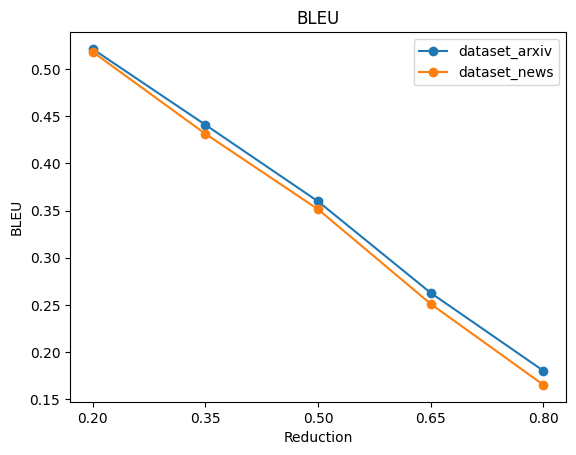

In [21]:
# Plot results
plt.plot(reduction_values, arxiv_average_bleu, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_bleu, 'o-', label='dataset_news')

#Add data point
for x, y in zip(reduction_values, arxiv_average_bleu):
    plt.annotate("", xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.annotate("", xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


plt.title('BLEU')
plt.xlabel('Reduction')
plt.ylabel('BLEU')

plt.xticks(reduction_values)

plt.legend()
plt.show()


## 2. meteor

In [22]:
# load the values of bleu
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_meteor_values = {reduction: [] for reduction in reduction_values}
news_meteor_values = {reduction: [] for reduction in reduction_values}
arxiv_meteor_values

{0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}

In [23]:
for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_meteor_values[reduction].append(data[key]['self-info-phrase']['meteor'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_meteor_values[reduction].append(data[key]['self-info-phrase']['meteor'])
arxiv_meteor_values

{0.2: [0.617678853255762,
  0.7122673371514643,
  0.7181136482378342,
  0.5441324577159331,
  0.6049844353245513,
  0.5333054801828646],
 0.35: [0.6553010877181754,
  0.4873130706075205,
  0.6587315899671589,
  0.49437116464346287,
  0.5561517673560694,
  0.5531004967151417],
 0.5: [0.4743578480995502,
  0.4736531949863539,
  0.5970818009315371,
  0.4323123221341846,
  0.6108012644663582,
  0.434542408318997],
 0.65: [0.3594701035586167,
  0.36425964782095327,
  0.35478643383334474,
  0.5524928199810845,
  0.3645376389796159,
  0.5339487746958341],
 0.8: [0.28411872657018944,
  0.5021621080544734,
  0.274898470674864,
  0.21952331192698632,
  0.2317598403824468,
  0.5158442080612989]}

In [24]:
# calculate the avarage meteor
arxiv_average_meteor = [np.mean(arxiv_meteor_values[reduction]) for reduction in reduction_values]
news_average_meteor = [np.mean(news_meteor_values[reduction]) for reduction in reduction_values]
arxiv_average_meteor,news_average_meteor

([0.6217470353114015,
  0.5674948628345882,
  0.5037914731561635,
  0.4215825698115749,
  0.3380511109450432],
 [0.670354561703863,
  0.6086116594438306,
  0.5331893423721727,
  0.440097836813544,
  0.3452761535190925])

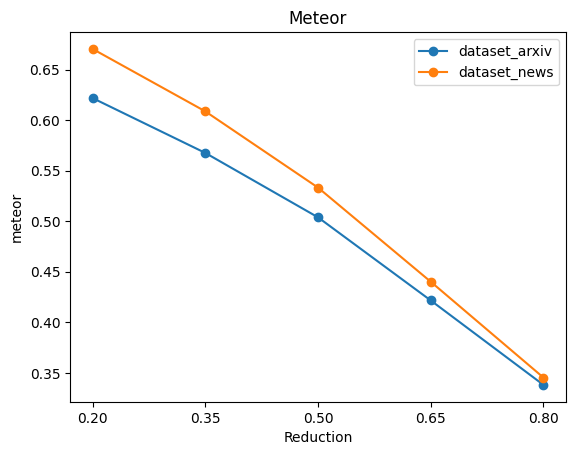

In [25]:
# Plot results
plt.plot(reduction_values, arxiv_average_meteor, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_meteor, 'o-', label='dataset_news')



plt.title('Meteor')
plt.xlabel('Reduction')
plt.ylabel('meteor')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 3.Rouge1

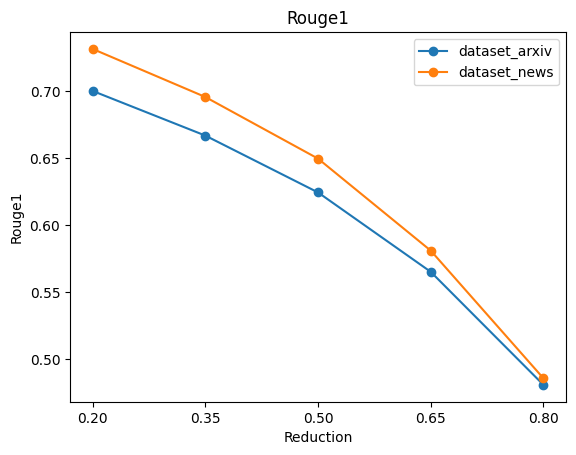

In [26]:
# load the values of rouge1
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_rouge1_values = {reduction: [] for reduction in reduction_values}
news_rouge1_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_rouge1_values[reduction].append(data[key]['self-info-phrase']['rouge1'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_rouge1_values[reduction].append(data[key]['self-info-phrase']['rouge1'])


# calculate the avarage rouge1
arxiv_average_rouge1 = [np.mean(arxiv_rouge1_values[reduction]) for reduction in reduction_values]
news_average_rouge1 = [np.mean(news_rouge1_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, arxiv_average_rouge1, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_rouge1, 'o-', label='dataset_news')



plt.title('Rouge1')
plt.xlabel('Reduction')
plt.ylabel('Rouge1')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 4. Rouge2

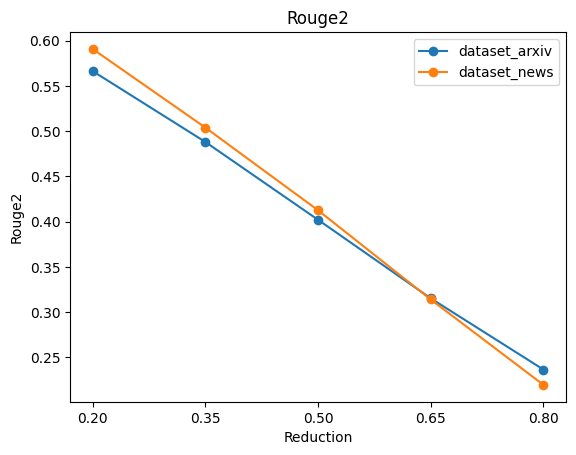

In [27]:
# load the values of rouge2
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_rouge2_values = {reduction: [] for reduction in reduction_values}
news_rouge2_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_rouge2_values[reduction].append(data[key]['self-info-phrase']['rouge2'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_rouge2_values[reduction].append(data[key]['self-info-phrase']['rouge2'])


# calculate the avarage rouge2
arxiv_average_rouge2 = [np.mean(arxiv_rouge2_values[reduction]) for reduction in reduction_values]
news_average_rouge2 = [np.mean(news_rouge2_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, arxiv_average_rouge2, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_rouge2, 'o-', label='dataset_news')



plt.title('Rouge2')
plt.xlabel('Reduction')
plt.ylabel('Rouge2')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 5 RougeL

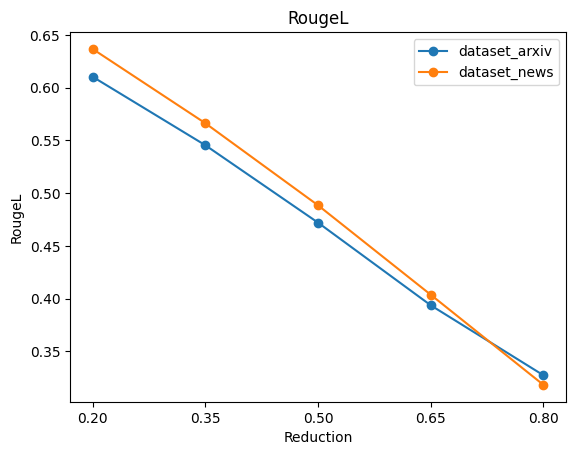

In [28]:
# load the values of rougeL
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_rougeL_values = {reduction: [] for reduction in reduction_values}
news_rougeL_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_rougeL_values[reduction].append(data[key]['self-info-phrase']['rougeL'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_rougeL_values[reduction].append(data[key]['self-info-phrase']['rougeL'])


# calculate the avarage rougeL
arxiv_average_rougeL = [np.mean(arxiv_rougeL_values[reduction]) for reduction in reduction_values]
news_average_rougeL = [np.mean(news_rougeL_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, arxiv_average_rougeL, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_rougeL, 'o-', label='dataset_news')


plt.title('RougeL')
plt.xlabel('Reduction')
plt.ylabel('RougeL')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 6.bertscore_precision

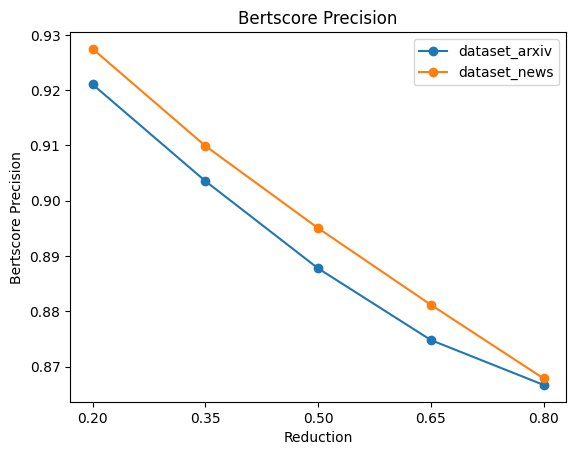

In [29]:
# load the values of bertscore_precision
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_bertscore_precision_values = {reduction: [] for reduction in reduction_values}
news_bertscore_precision_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_bertscore_precision_values[reduction].append(data[key]['self-info-phrase']['bertscore_precision'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_bertscore_precision_values[reduction].append(data[key]['self-info-phrase']['bertscore_precision'])


# calculate the avarage bertscore_precision
arxiv_average_bertscore_precision = [np.mean(arxiv_bertscore_precision_values[reduction]) for reduction in reduction_values]
news_average_bertscore_precision = [np.mean(news_bertscore_precision_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, arxiv_average_bertscore_precision, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_bertscore_precision, 'o-', label='dataset_news')


plt.title('Bertscore Precision')
plt.xlabel('Reduction')
plt.ylabel('Bertscore Precision')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 7. bertscore_recall

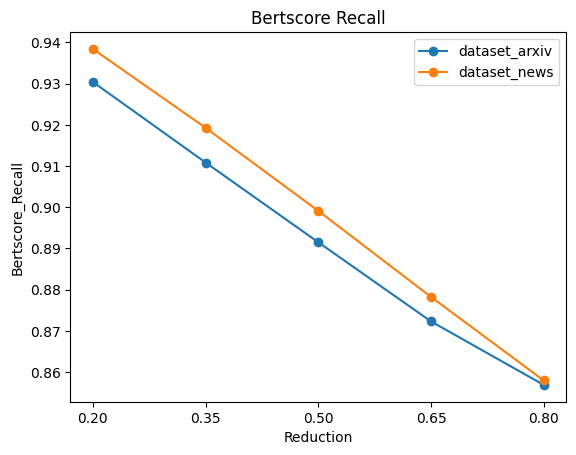

In [30]:
# load the values of bertscore_recall
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_bertscore_recall_values = {reduction: [] for reduction in reduction_values}
news_bertscore_recall_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_bertscore_recall_values[reduction].append(data[key]['self-info-phrase']['bertscore_recall'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_bertscore_recall_values[reduction].append(data[key]['self-info-phrase']['bertscore_recall'])


# calculate the avarage bertscore_recall
arxiv_average_bertscore_recall = [np.mean(arxiv_bertscore_recall_values[reduction]) for reduction in reduction_values]
news_average_bertscore_recall = [np.mean(news_bertscore_recall_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, arxiv_average_bertscore_recall, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_bertscore_recall, 'o-', label='dataset_news')


plt.title('Bertscore Recall')
plt.xlabel('Reduction')
plt.ylabel('Bertscore_Recall')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 8. bestscore_f1

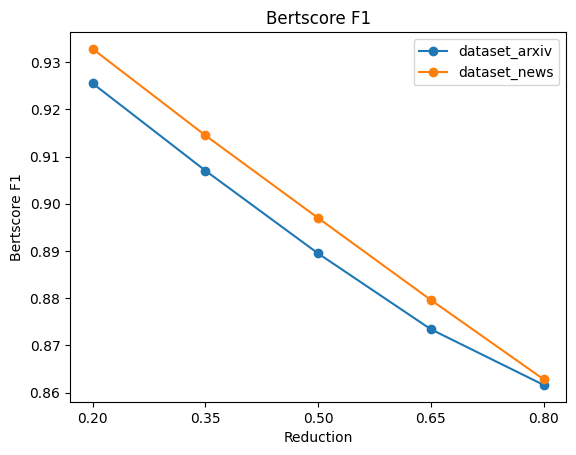

In [31]:
# load the values of bertscore_f1
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_bertscore_f1_values = {reduction: [] for reduction in reduction_values}
news_bertscore_f1_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_bertscore_f1_values[reduction].append(data[key]['self-info-phrase']['bertscore_f1'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_bertscore_f1_values[reduction].append(data[key]['self-info-phrase']['bertscore_f1'])


# calculate the avarage bertscore_f1
arxiv_average_bertscore_f1 = [np.mean(arxiv_bertscore_f1_values[reduction]) for reduction in reduction_values]
news_average_bertscore_f1 = [np.mean(news_bertscore_f1_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, arxiv_average_bertscore_f1, 'o-', label='dataset_arxiv')
plt.plot(reduction_values, news_average_bertscore_f1, 'o-', label='dataset_news')


plt.title('Bertscore F1')
plt.xlabel('Reduction')
plt.ylabel('Bertscore F1')

plt.xticks(reduction_values)

plt.legend()
plt.show()

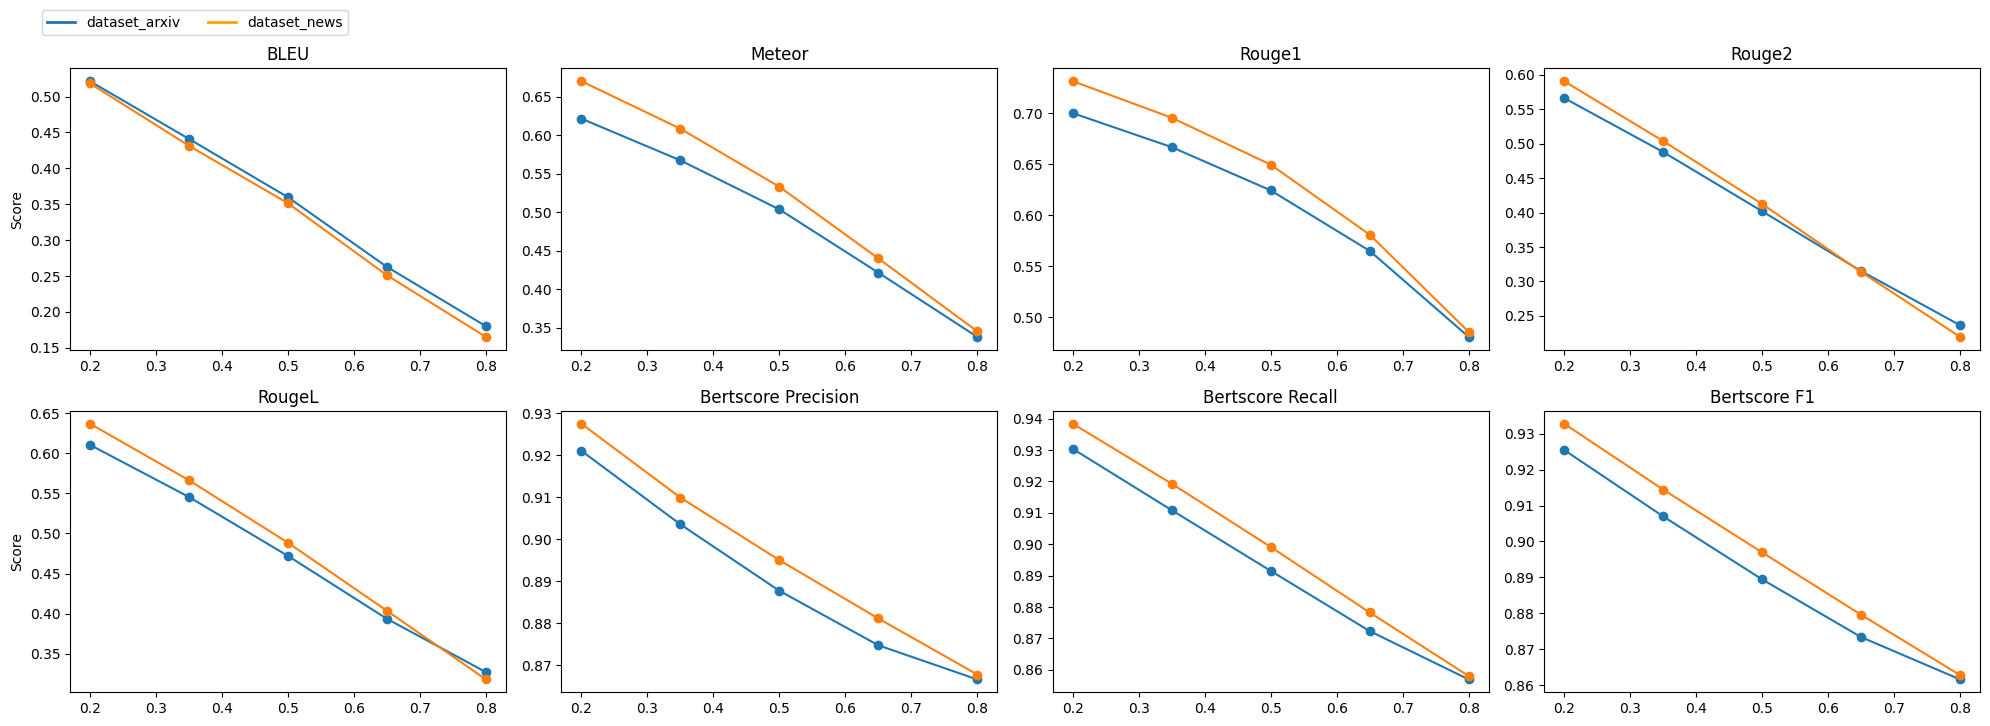

In [57]:
# Plotting setup
fig, axs = plt.subplots(2, 4, figsize=(20, 7))  # create a grid of 2 rows and 4 columns of subplots

# All metrics to loop over
metrics = ['BLEU', 'Meteor', 'Rouge1', 'Rouge2', 'RougeL', 'Bertscore Precision', 'Bertscore Recall', 'Bertscore F1']
average_values_datasets = [arxiv_average_bleu, news_average_bleu,
                           arxiv_average_meteor, news_average_meteor,
                           arxiv_average_rouge1, news_average_rouge1,
                           arxiv_average_rouge2, news_average_rouge2,
                           arxiv_average_rougeL, news_average_rougeL,
                           arxiv_average_bertscore_precision, news_average_bertscore_precision,
                           arxiv_average_bertscore_recall, news_average_bertscore_recall,
                           arxiv_average_bertscore_f1, news_average_bertscore_f1]

# Prepare lines for the legend
"""
If you want to change the name of legend, you can change label='dataset_arxiv' to label='Anything you want'
"""
lines = [Line2D([0], [0], lw=2, label='dataset_arxiv'),
         Line2D([0], [0], color='orange', lw=2, label='dataset_news')]

# Loop over all subplots
for idx, ax in enumerate(axs.flat):
    metric = metrics[idx]
    average_arxiv = average_values_datasets[2*idx]
    average_news = average_values_datasets[2*idx+1]
    ax.plot(reduction_values, average_arxiv, 'o-')
    ax.plot(reduction_values, average_news, 'o-')
    ax.set_title(metric)
    if idx % 4 == 0:  # If it's the first pic, keeping the score on the left
        ax.set_ylabel('Score')
    else:
        ax.set_ylabel('')

# Place legend
fig.legend(handles=lines, loc='upper center', ncol=2, bbox_to_anchor=(0.1, 1.04))

plt.tight_layout()
plt.show()
